In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [103]:
image_path = 'N1.jpeg'  
image = cv2.imread(image_path)


In [104]:
cv2.imshow('Image1', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.6.0) C:\b\abs_f8n1j3l9l0\croot\opencv-suite_1691622637237\work\modules\highgui\src\window.cpp:1267: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


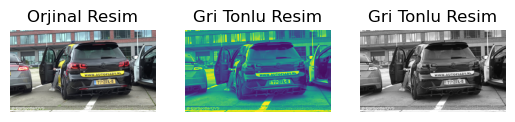

In [105]:
# Resmi gri tonlamaya cevir
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# İki resmi ekrana yazdir
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Orjinal Resim')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_image)
plt.title('Gri Tonlu Resim')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_image, cmap="gray")
plt.title('Gri Tonlu Resim')
plt.axis('off')


plt.show()

In [106]:
pixel = np.array(image)
pixel[208,]

array([[136, 137, 128],
       [136, 137, 128],
       [136, 137, 128],
       ...,
       [204, 197, 182],
       [205, 198, 183],
       [205, 198, 183]], dtype=uint8)

In [107]:
image[2,2]

array([238, 241, 202], dtype=uint8)

#  image segmentation using Otsu’s thresholding

In [108]:
# Histogram Original
h = np.zeros((256,))
[rows,cols] = image.shape

#image_uint8 = image.astype(np.uint8)



for i in range(rows):
    for j in range(cols):
        pix = image[i,j]
        h[pix] = h[pix] + 1

plt.bar(range(256),h)
plt.title("Original Histogram")
plt.xlabel('Piksel Değerleri')
plt.ylabel('Frekans')
plt.show()


ValueError: too many values to unpack (expected 2)

In [120]:
image

array([[[210, 214, 172],
        [215, 219, 178],
        [222, 226, 185],
        ...,
        [116, 120, 149],
        [116, 120, 149],
        [116, 120, 149]],

       [[209, 213, 172],
        [216, 220, 179],
        [227, 231, 190],
        ...,
        [129, 131, 161],
        [128, 130, 160],
        [127, 129, 159]],

       [[212, 215, 176],
        [222, 225, 186],
        [238, 241, 202],
        ...,
        [127, 129, 159],
        [125, 127, 157],
        [125, 127, 157]],

       ...,

       [[177, 203, 215],
        [173, 199, 211],
        [167, 193, 205],
        ...,
        [150, 161, 158],
        [155, 166, 163],
        [181, 192, 189]],

       [[121, 148, 162],
        [115, 142, 156],
        [107, 134, 148],
        ...,
        [108, 119, 116],
        [110, 121, 118],
        [132, 143, 140]],

       [[ 64,  93, 107],
        [ 57,  86, 100],
        [ 48,  77,  91],
        ...,
        [128, 139, 136],
        [130, 141, 138],
        [129, 140, 137]]

In [121]:
# Histogram kontrol
# Resmi oku
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Histogramı çıkar
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Histogramı ekrana yazdır
plt.plot(hist)
plt.title('Görüntü Histogramı')
plt.xlabel('Piksel Değerleri')
plt.ylabel('Frekans')
plt.show()

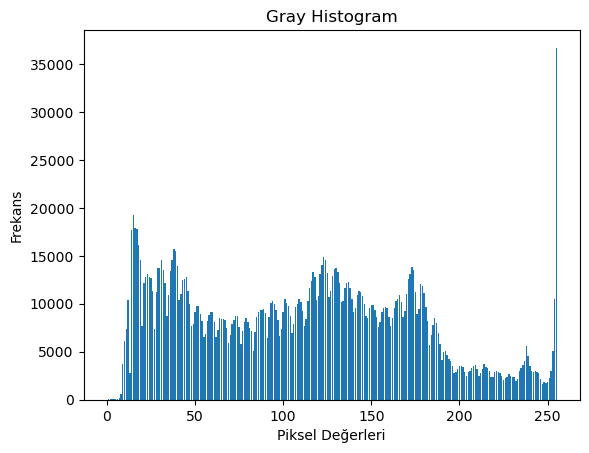

In [122]:
# Histogram Gray
h = np.zeros((256,))
[rows,cols] = gray_image.shape

#image_uint8 = image.astype(np.uint8)
#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

for i in range(rows):
    for j in range(cols):
        pix = gray_image[i,j]
        h[pix] = h[pix] + 1

plt.bar(range(256),h)
plt.title("Gray Histogram")
plt.xlabel('Piksel Değerleri')
plt.ylabel('Frekans')
plt.show()


In [123]:
#Histogramda her piksel değerine karşılık gelen piksel sayılarını toplayın.

total_pixels = np.sum(h)
h

array([5.0000e+00, 7.4000e+01, 6.9000e+01, 8.8000e+01, 1.0800e+02,
       1.2300e+02, 1.2300e+02, 2.0900e+02, 5.5900e+02, 3.7480e+03,
       6.0740e+03, 7.4060e+03, 1.0375e+04, 2.8020e+03, 1.7715e+04,
       1.9215e+04, 1.7948e+04, 1.7775e+04, 1.6127e+04, 1.4531e+04,
       7.6520e+03, 1.2214e+04, 1.2803e+04, 1.3056e+04, 1.2783e+04,
       1.2645e+04, 1.1342e+04, 7.3340e+03, 1.1210e+04, 1.3726e+04,
       1.3679e+04, 1.4557e+04, 1.3561e+04, 1.2144e+04, 8.7710e+03,
       1.0863e+04, 1.3367e+04, 1.4579e+04, 1.5752e+04, 1.5507e+04,
       1.3916e+04, 1.0425e+04, 1.1060e+04, 1.2474e+04, 1.2582e+04,
       1.2794e+04, 1.1345e+04, 9.9370e+03, 7.6500e+03, 7.8580e+03,
       9.1760e+03, 9.7760e+03, 9.8040e+03, 8.9670e+03, 8.1540e+03,
       6.5130e+03, 6.8470e+03, 8.2180e+03, 8.8270e+03, 9.0910e+03,
       9.1910e+03, 8.1520e+03, 6.4900e+03, 7.2530e+03, 8.4940e+03,
       8.4580e+03, 8.3680e+03, 8.3560e+03, 7.4870e+03, 5.8750e+03,
       6.7740e+03, 7.9250e+03, 8.3190e+03, 8.6740e+03, 8.6970e

In [124]:
#Ağırlıklı Olasılıkları ve Kumulatif Olasılıkları Hesaplama

probabilities = h / total_pixels
cumulative_probabilities = np.cumsum(probabilities)
print(probabilities)
print(cumulative_probabilities)

[2.41126543e-06 3.56867284e-05 3.32754630e-05 4.24382716e-05
 5.20833333e-05 5.93171296e-05 5.93171296e-05 1.00790895e-04
 2.69579475e-04 1.80748457e-03 2.92920525e-03 3.57156636e-03
 5.00337577e-03 1.35127315e-03 8.54311343e-03 9.26649306e-03
 8.65547840e-03 8.57204861e-03 7.77729552e-03 7.00761960e-03
 3.69020062e-03 5.89023920e-03 6.17428627e-03 6.29629630e-03
 6.16464120e-03 6.09809028e-03 5.46971451e-03 3.53684414e-03
 5.40605710e-03 6.61940586e-03 6.59673997e-03 7.02015818e-03
 6.53983410e-03 5.85648148e-03 4.22984182e-03 5.23871528e-03
 6.44627701e-03 7.03076775e-03 7.59645062e-03 7.47829861e-03
 6.71103395e-03 5.02748843e-03 5.33371914e-03 6.01562500e-03
 6.06770833e-03 6.16994599e-03 5.47116127e-03 4.79214892e-03
 3.68923611e-03 3.78954475e-03 4.42515432e-03 4.71450617e-03
 4.72800926e-03 4.32436343e-03 3.93229167e-03 3.14091435e-03
 3.30198688e-03 3.96315586e-03 4.25684799e-03 4.38416281e-03
 4.43238812e-03 3.93132716e-03 3.12982253e-03 3.49778164e-03
 4.09625772e-03 4.078896

In [125]:
#Sınıf Ortalamalarını ve Toplam Varyansı Hesaplama

class_means = np.cumsum(probabilities * np.arange(0, 256))
global_mean = class_means[-1]

between_class_variance = (total_pixels * np.power(global_mean * cumulative_probabilities - class_means, 2))
print(class_means)
print(global_mean)
print(between_class_variance)

[0.00000000e+00 3.56867284e-05 1.02237654e-04 2.29552469e-04
 4.37885802e-04 7.34471451e-04 1.09037423e-03 1.79591049e-03
 3.95254630e-03 2.02199074e-02 4.95119599e-02 8.87991898e-02
 1.48839699e-01 1.66406250e-01 2.86009838e-01 4.25007234e-01
 5.63494888e-01 7.09219715e-01 8.49211034e-01 9.82355806e-01
 1.05615982e+00 1.17985484e+00 1.31568914e+00 1.46050395e+00
 1.60845534e+00 1.76090760e+00 1.90312018e+00 1.99861497e+00
 2.14998457e+00 2.34194734e+00 2.53984954e+00 2.75747444e+00
 2.96674913e+00 3.16001302e+00 3.30382764e+00 3.48718268e+00
 3.71924865e+00 3.97938706e+00 4.26805218e+00 4.55970583e+00
 4.82814718e+00 5.03427421e+00 5.25829041e+00 5.51696229e+00
 5.78394145e+00 6.06158902e+00 6.31326244e+00 6.53849344e+00
 6.71557677e+00 6.90126447e+00 7.12252218e+00 7.36296200e+00
 7.60881848e+00 7.83800974e+00 8.05035349e+00 8.22310378e+00
 8.40801505e+00 8.63391493e+00 8.88081211e+00 9.13947772e+00
 9.40542101e+00 9.64523196e+00 9.83928096e+00 1.00596412e+01
 1.03218017e+01 1.058693

In [126]:
#En İyi Eşik Değerini Seçme
optimal_threshold = np.argmax(between_class_variance) + 20
print(optimal_threshold)

132


In [127]:
#Eşikleme Uygulama
_, binary_image = cv2.threshold(gray_image, optimal_threshold, 255, cv2.THRESH_BINARY)


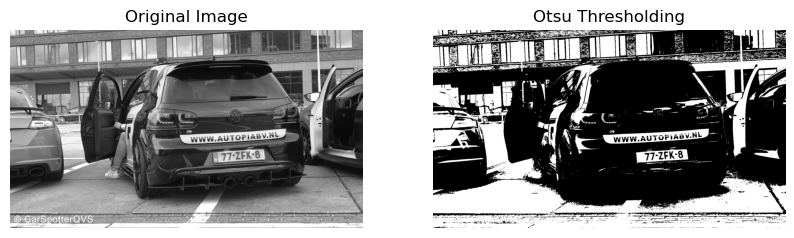

In [128]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')

plt.show()

# Gürültü Temizleme ve Görüntü Çıkarma

In [129]:
#Median Filter faydasını gormedim

median_filtered = cv2.medianBlur(binary_image, 3) 

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Otsu Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Otsu Image with Median Filter")
plt.axis("off")

plt.show()

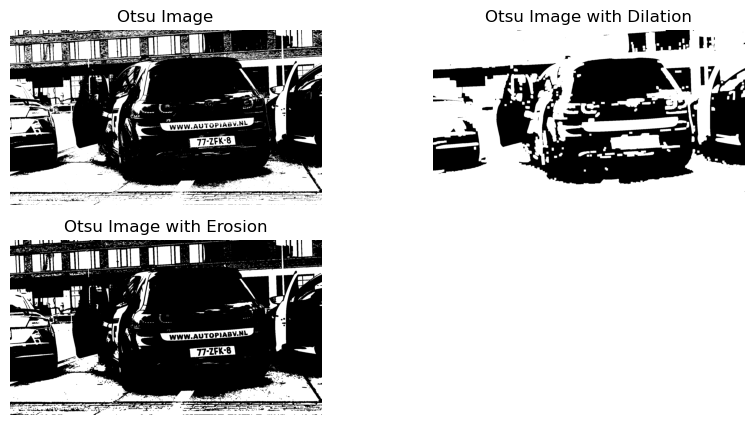

In [130]:
# Erozyon işlemi
#kernel = np.ones((3,3),np.uint8) # Kerneller arasinda seçim yap
#erosion = cv2.erode(binary_image, kernel)
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) # square_kernel

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7)) # rect_kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) # rect_kernel



# Dilatasyon işlemi
dilation = cv2.dilate(binary_image, kernel1, iterations=2) # 2 ve 3 arasinda karar ver. Kernelleri degistir 

erosion = cv2.erode(binary_image, kernel, iterations=1)


plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Otsu Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilation, cmap="gray")
plt.title("Otsu Image with Dilation")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(erosion, cmap="gray")
plt.title("Otsu Image with Erosion")
plt.axis("off")


plt.show()

In [131]:
# Goruntu Cikarma

difference = cv2.absdiff(erosion, dilation)

plt.imshow(difference, cmap="gray")

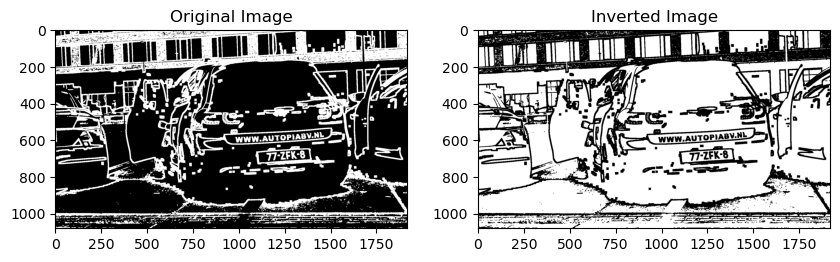

In [132]:
inverted_image = 255 - difference

# Görüntüleri göster
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(difference, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(inverted_image, cmap='gray')
plt.title('Inverted Image')

plt.show()

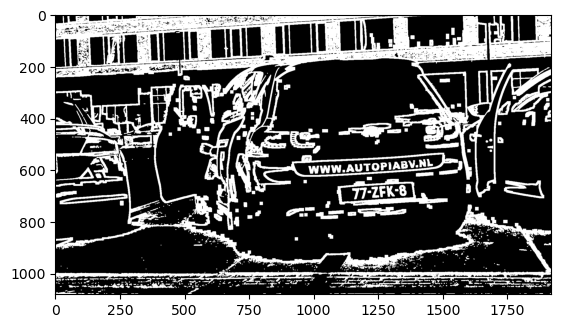

In [133]:
# Görüntülerin türünü uint8'ye dönüştür
erosion = np.uint8(erosion)
inverted_image = np.uint8(inverted_image)

# Goruntu Cikarma

difference2 = cv2.absdiff(inverted_image, erosion)

plt.imshow(difference, cmap="gray")

# Kontur 

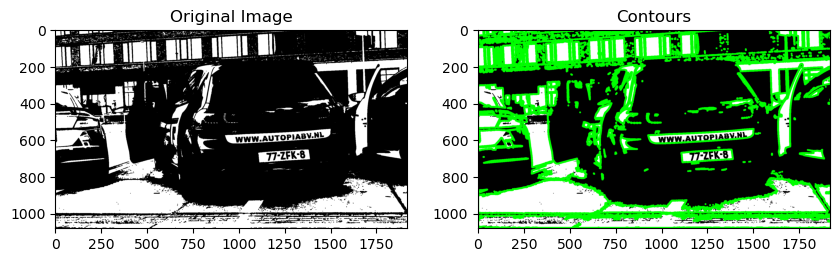

In [134]:
# Konturları bul
contours, _ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Görüntüyü renklendir
color_image = cv2.cvtColor(erosion, cv2.COLOR_GRAY2BGR)

# Konturları çiz
cv2.drawContours(color_image, contours, -1, (0, 255, 0), 10)

# Görüntüleri göster
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(erosion, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(color_image)
plt.title('Contours')

plt.show()

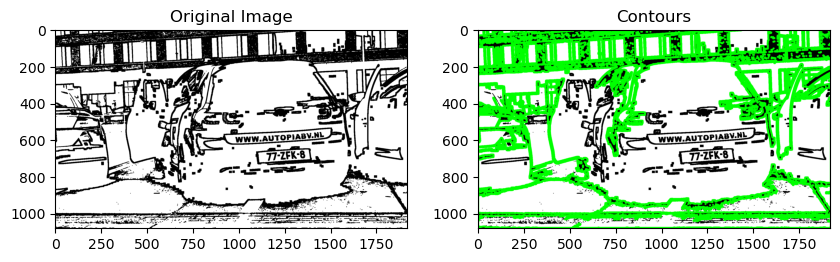

In [135]:
# Konturları bul
contours, _ = cv2.findContours(inverted_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Görüntüyü renklendir
color_image = cv2.cvtColor(inverted_image, cv2.COLOR_GRAY2BGR)

# Konturları çiz
cv2.drawContours(color_image, contours, -1, (0, 255, 0), 10)

# Görüntüleri göster
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(inverted_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(color_image)
plt.title('Contours')

plt.show()

# Görüntü Kırpma

In [136]:
import cv2
import matplotlib.pyplot as plt

# Konturları bul
contours, _ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Görüntüyü renklendir
color_image = cv2.cvtColor(erosion, cv2.COLOR_GRAY2BGR)

# Konturları çiz
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(color_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Görüntüleri göster
plt.figure(figsize=(10, 5))


plt.imshow(color_image)
plt.title('Contours with Bounding Boxes')

plt.show()


In [137]:
import cv2
import matplotlib.pyplot as plt

# Konturları bul
contours, _ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Görüntüyü renklendir
color_image = cv2.cvtColor(erosion, cv2.COLOR_GRAY2BGR)

# Konturları çiz
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Genişlik ve yükseklik koşullarını kontrol et
    if 3 <= w/h <= 5:
        # Dikdörtgen çiz
        cv2.rectangle(color_image, (x, y), (x+w, y+h), (0, 255, 0), 2)


# Görüntüleri göster
plt.figure(figsize=(10, 5))


plt.imshow(color_image)
plt.title('Contours with Bounding Boxes')

plt.show()


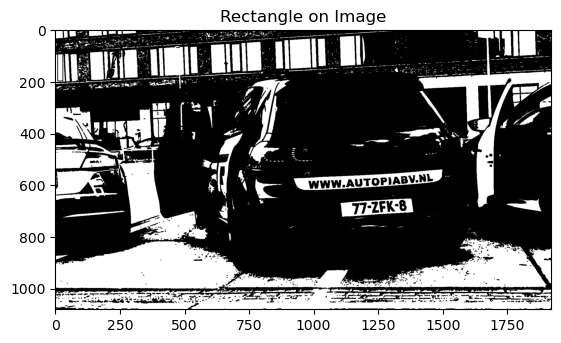

In [138]:
# Koordinatları belirle
x, y, w, h = 10, 50, 20, 150
# Belirtilen koordinatlarda dikdörtgen çiz
cv2.rectangle(erosion, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Görüntüyü göster
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.title('Rectangle on Image')
plt.show()

In [139]:
import cv2
import matplotlib.pyplot as plt



# Konturları bul
contours, _ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
max_contour = None

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Genişlik ve yükseklik koşullarını kontrol et
    if 3 <= w/h <= 5:
        # Alanı hesapla
        area = w * h
        
        # En büyük alanı ve konturu güncelle
        if area > max_area:
            max_area = area
            max_contour = contour

# En büyük dikdörtgeni çiz
if max_contour is not None:
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # En büyük dikdörtgeni renkli görüntü üzerine çiz
    cv2.rectangle(erosion, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Belirtilen koordinatlarda görüntüyü kırp
cropped_image = erosion[y:y+h, x:x+w]

# Kırpılmış görüntüyü göster
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()


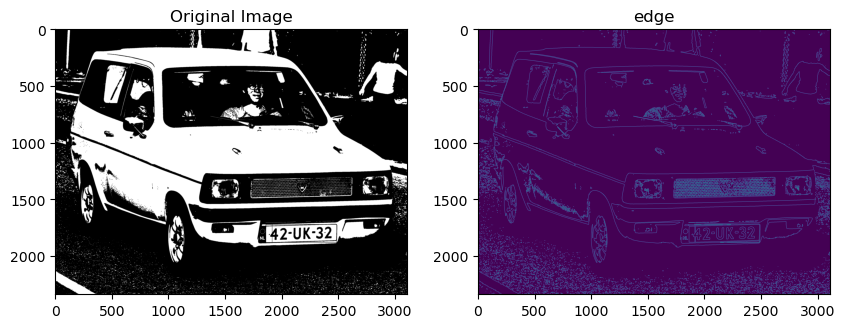

In [117]:
import cv2
import numpy as np

# Görüntüyü yükle
#image = cv2.imread(erosion, cv2.IMREAD_GRAYSCALE)

# Canny kenar tespiti uygula
edges = cv2.Canny(erosion, 50, 150)

# Sonuçları göster
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(erosion, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges)
plt.title('edge')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

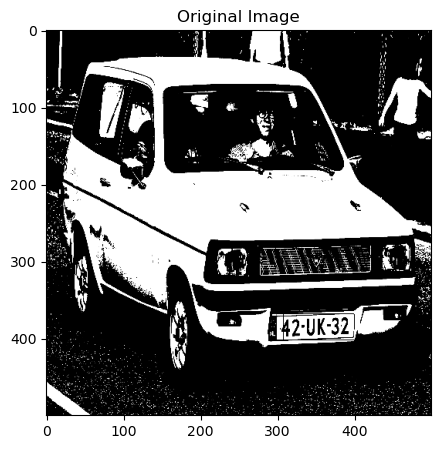

In [118]:
erosion= cv2.resize(erosion,(500,500))

plt.figure(figsize=(10, 5))

plt.imshow(erosion, cmap='gray')
plt.title('Original Image')

plt.show

muh_plaka medyan:nan genislik: 473.6085510253906 yukseklik:142.00131225585938


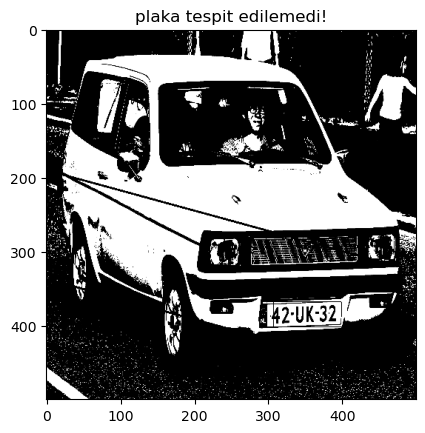

muh_plaka medyan:0.0 genislik: 41.853546142578125 yukseklik:168.8498077392578


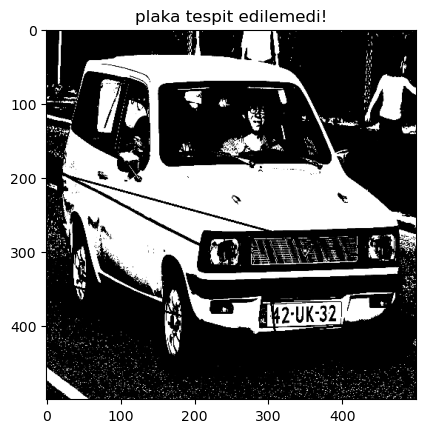

muh_plaka medyan:255.0 genislik: 26.81083869934082 yukseklik:71.87435150146484


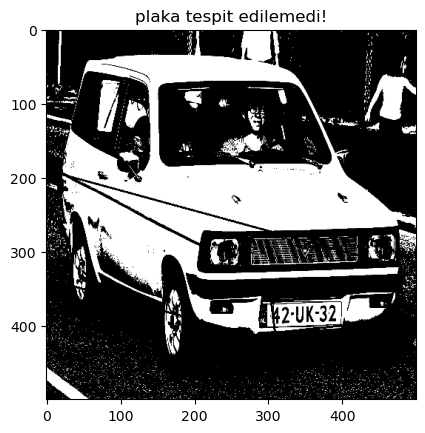

muh_plaka medyan:0.0 genislik: 33.50572204589844 yukseklik:143.5193634033203


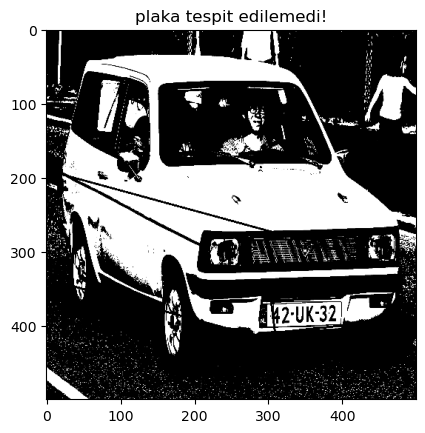

muh_plaka medyan:nan genislik: 71.57343292236328 yukseklik:18.10042953491211


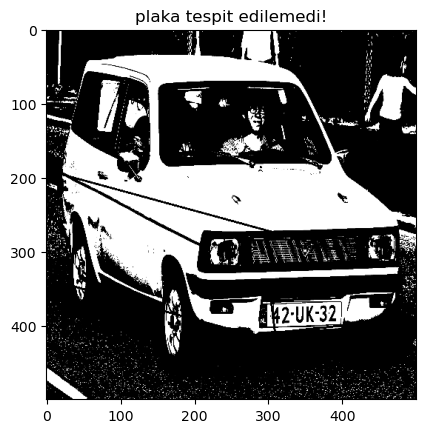

muh_plaka medyan:0.0 genislik: 72.28244018554688 yukseklik:17.027956008911133


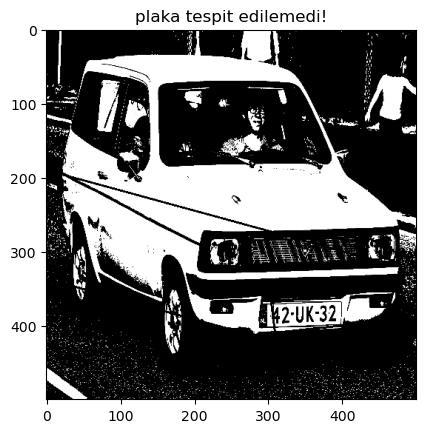

muh_plaka medyan:0.0 genislik: 71.0 yukseklik:16.0


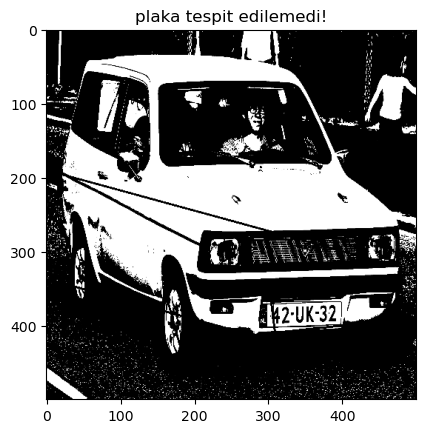

muh_plaka medyan:0.0 genislik: 16.784791946411133 yukseklik:34.29648208618164


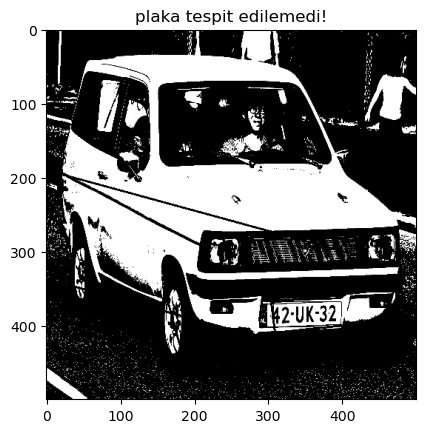

muh_plaka medyan:255.0 genislik: 29.0 yukseklik:7.0


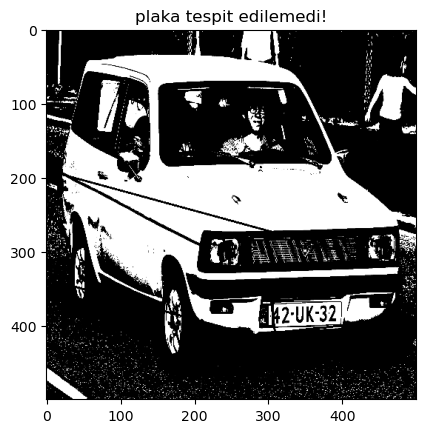

muh_plaka medyan:255.0 genislik: 3.231539011001587 yukseklik:74.05886840820312


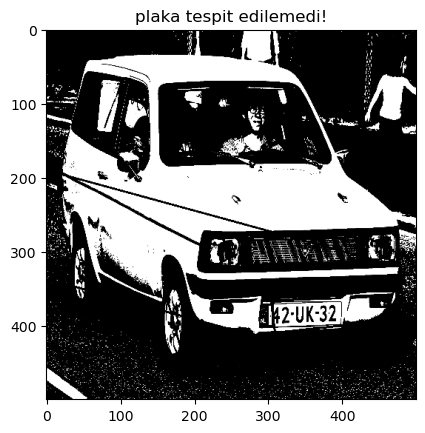

muh_plaka medyan:nan genislik: 35.89527130126953 yukseklik:4.850712299346924


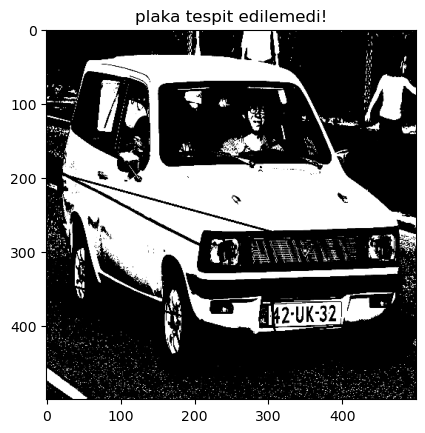

muh_plaka medyan:0.0 genislik: 7.0 yukseklik:46.0


muh_plaka medyan:0.0 genislik: 28.06005096435547 yukseklik:8.258809089660645


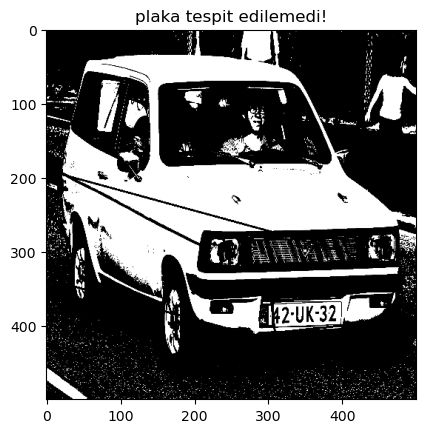

muh_plaka medyan:0.0 genislik: 8.875272750854492 yukseklik:17.979585647583008


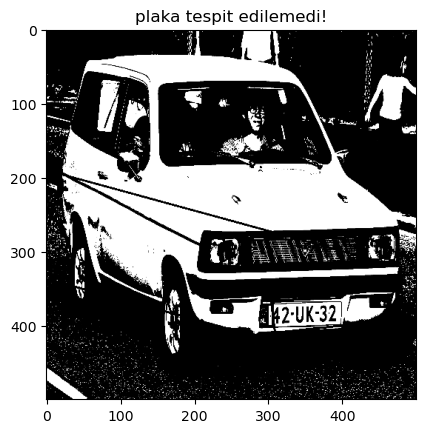

muh_plaka medyan:0.0 genislik: 23.47627830505371 yukseklik:9.013814926147461


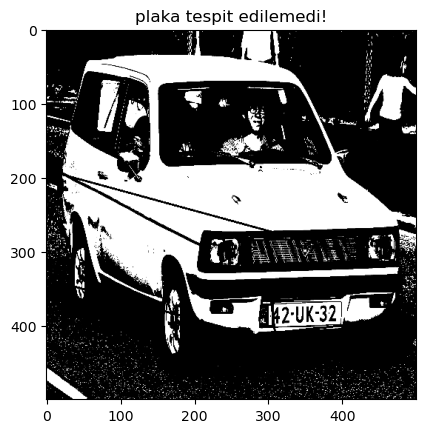

muh_plaka medyan:0.0 genislik: 9.246251106262207 yukseklik:21.067407608032227


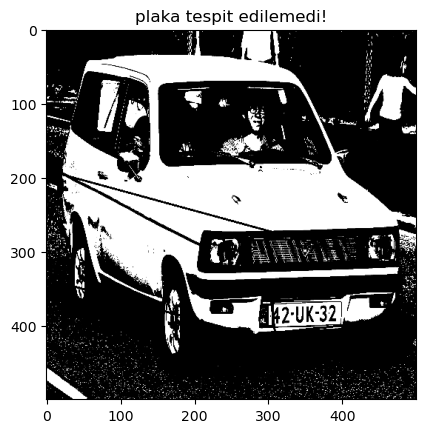

muh_plaka medyan:0.0 genislik: 16.546903610229492 yukseklik:5.366563320159912


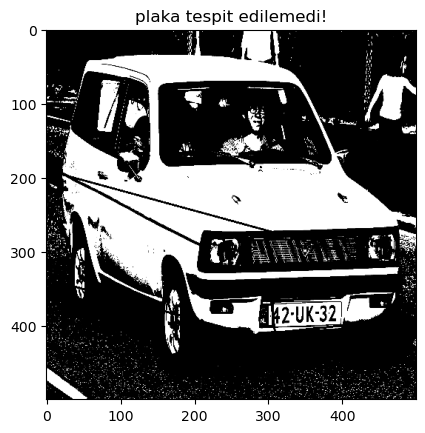

muh_plaka medyan:255.0 genislik: 5.0 yukseklik:11.0


muh_plaka medyan:255.0 genislik: 3.0 yukseklik:24.0


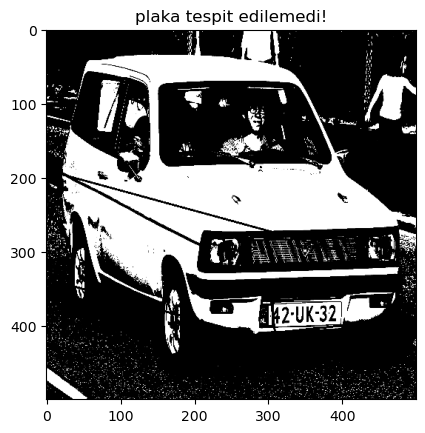

muh_plaka medyan:0.0 genislik: 9.0 yukseklik:32.0


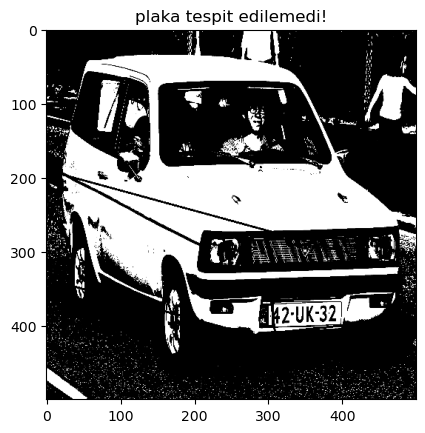

muh_plaka medyan:57.0 genislik: 4.427188873291016 yukseklik:9.486833572387695


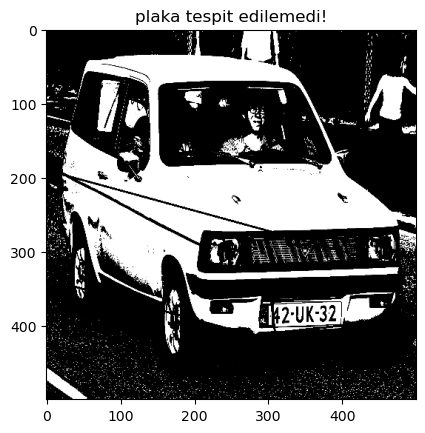

muh_plaka medyan:0.0 genislik: 18.167997360229492 yukseklik:2.921128988265991


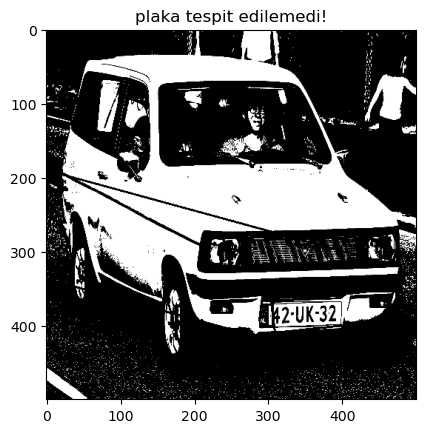

muh_plaka medyan:0.0 genislik: 5.0596442222595215 yukseklik:12.649109840393066


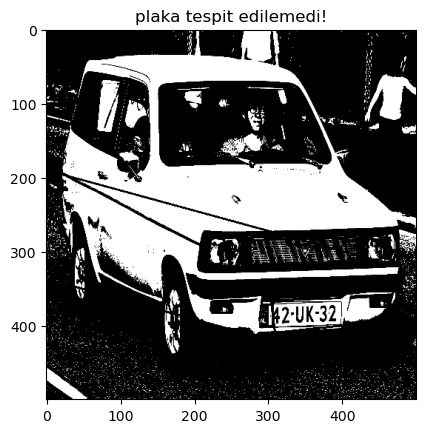

muh_plaka medyan:0.0 genislik: 13.88206672668457 yukseklik:3.6047356128692627


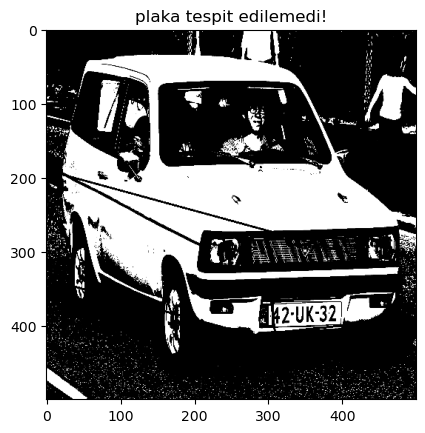

muh_plaka medyan:20.0 genislik: 2.0 yukseklik:13.0


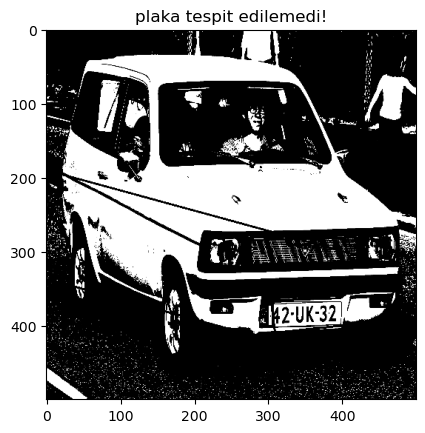

muh_plaka medyan:0.0 genislik: 7.202939987182617 yukseklik:2.915475845336914


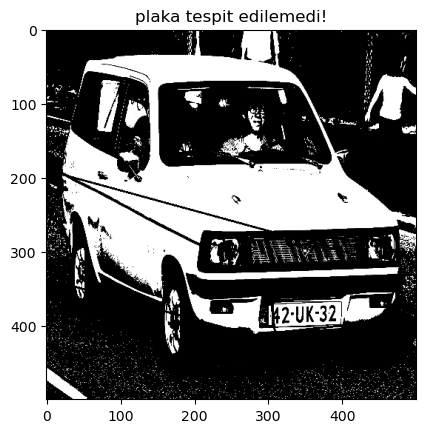

muh_plaka medyan:0.0 genislik: 13.339459419250488 yukseklik:5.3357834815979


muh_plaka medyan:255.0 genislik: 2.0 yukseklik:7.0


muh_plaka medyan:255.0 genislik: 1.0 yukseklik:10.0


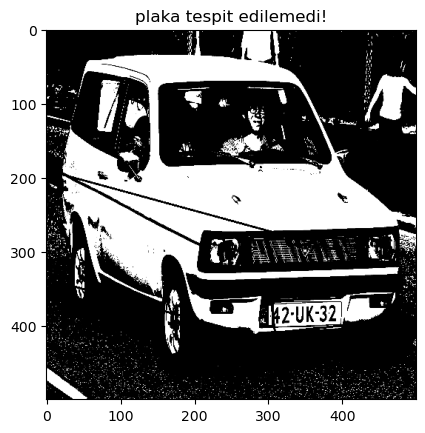

muh_plaka medyan:21.0 genislik: 8.0 yukseklik:1.0


muh_plaka medyan:0.0 genislik: 7.033533096313477 yukseklik:2.9104275703430176


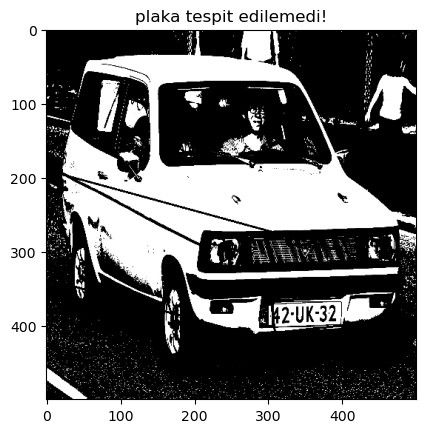

muh_plaka medyan:0.0 genislik: 11.940446853637695 yukseklik:1.9900743961334229


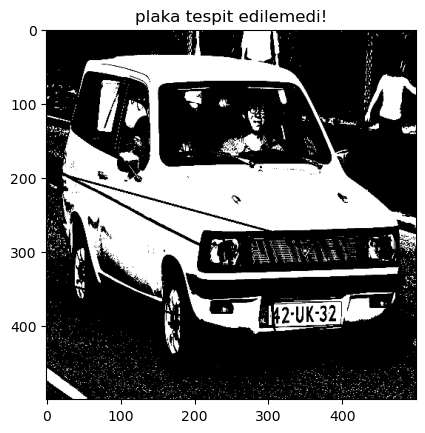

muh_plaka medyan:0.0 genislik: 9.938838005065918 yukseklik:2.2086305618286133


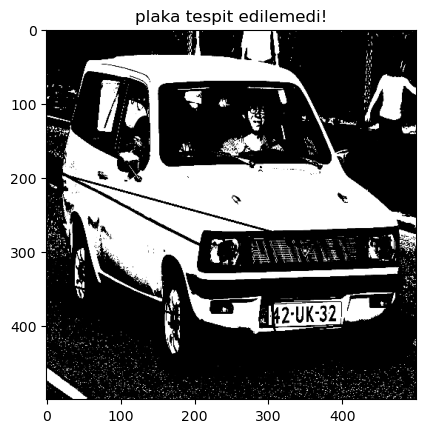

muh_plaka medyan:0.0 genislik: 5.0 yukseklik:13.0


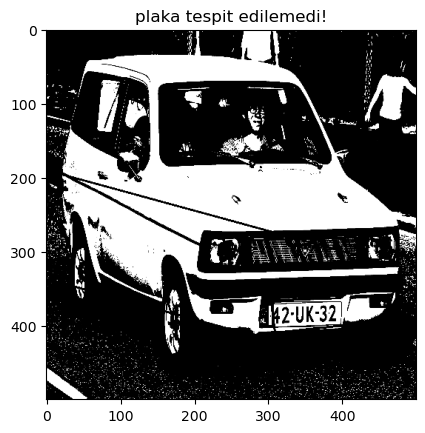

muh_plaka medyan:0.0 genislik: 2.74721097946167 yukseklik:7.554830074310303


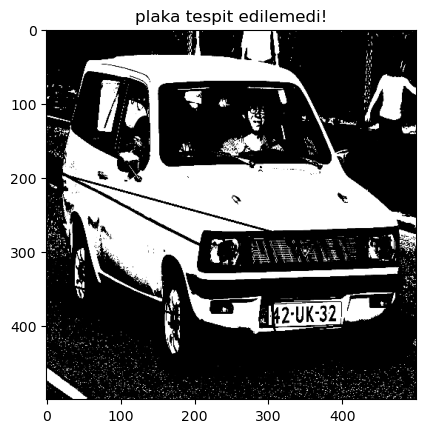

muh_plaka medyan:0.0 genislik: 8.9442720413208 yukseklik:4.0249223709106445


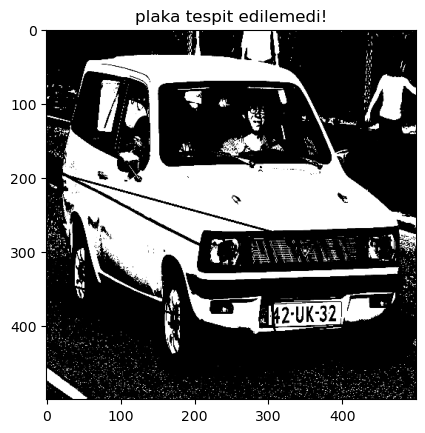

muh_plaka medyan:0.0 genislik: 6.6884446144104 yukseklik:3.2584731578826904


muh_plaka medyan:0.0 genislik: 5.0 yukseklik:1.0


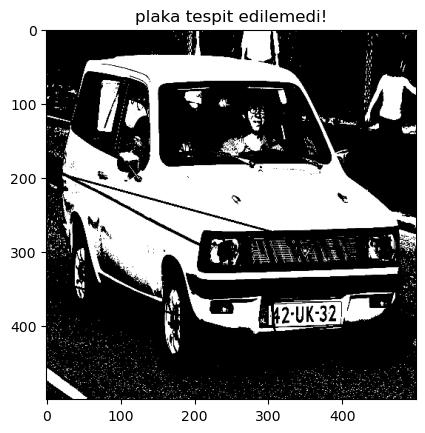

muh_plaka medyan:0.0 genislik: 4.949747085571289 yukseklik:1.4142134189605713


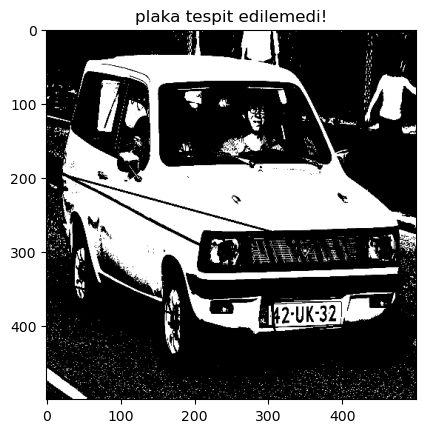

muh_plaka medyan:0.0 genislik: 1.5811388492584229 yukseklik:4.427187919616699


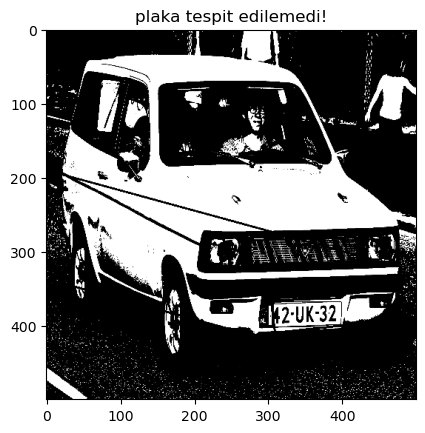

muh_plaka medyan:39.0 genislik: 2.0 yukseklik:9.0


muh_plaka medyan:21.0 genislik: 2.0 yukseklik:11.0


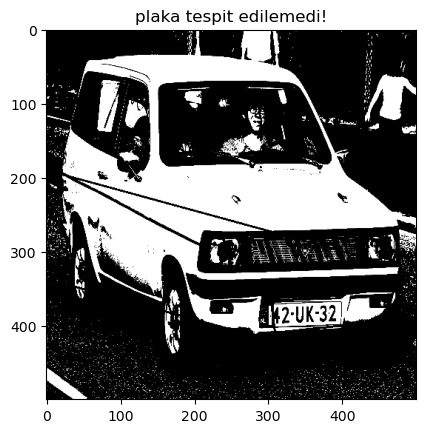

muh_plaka medyan:61.0 genislik: 1.0 yukseklik:7.0


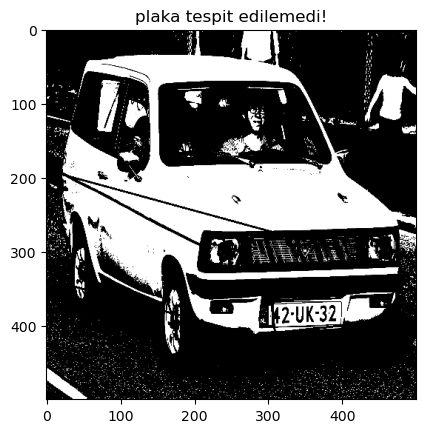

muh_plaka medyan:133.0 genislik: 1.4142134189605713 yukseklik:3.535533905029297


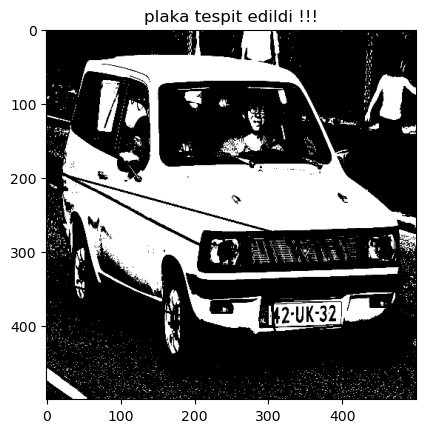

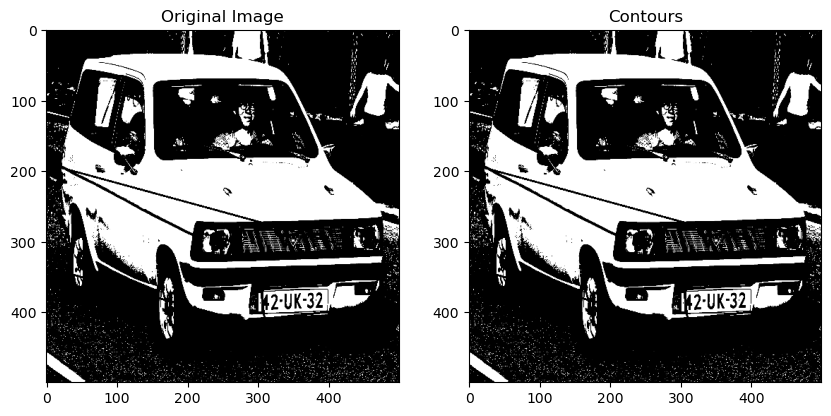

In [119]:
# Konturları bul
#contours = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
erosion
cnt = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = cnt[0]
cnt = sorted(cnt,key=cv2.contourArea,reverse=True)

H,W = 500,500
plaka = None

for c in cnt:
    rect = cv2.minAreaRect(c) #dikdortgen yapıda al (1)
    (x,y),(w,h),r = rect
    if(w>h and w>h*2) or (h>w and h>w*2):#oran en az 2 (2)
        box = cv2.boxPoints(rect) #[[12,13],[25,13],[20,13],[13,45]]
        box = np.int64(box)

        minx = np.min(box[:,0])
        miny = np.min(box[:,1])
        maxx = np.max(box[:,0])
        maxy = np.max(box[:,1])


        muh_plaka = erosion[miny:maxy,minx:maxx].copy()
        muh_medyan = np.median(muh_plaka)

        
        kon1 = muh_medyan>85 and muh_medyan<200 # yogunluk kontrolu (3)
        kon2 = h<50 and w<150 #sınır kontrolu (4)
        kon3 = w<50 and h<150 #sınır kontrolu (4)

        print(f"muh_plaka medyan:{muh_medyan} genislik: {w} yukseklik:{h}")

        plt.figure()
        kon=False
        if(kon1 and (kon2 or kon3)):
            #plaka'dır
            
            cv2.drawContours(erosion,[box],0,(0,255,0),2)
            plaka =[int(i) for i in [minx,miny,w,h]]#x,y,w,h

            plt.title("plaka tespit edildi !!!")
            kon=True
        else:
            #plaka değidir
            cv2.drawContours(erosion,[box],0,(0,0,255),2)
            plt.title("plaka tespit edilemedi!")
        
        plt.imshow(cv2.cvtColor(erosion,cv2.COLOR_BGR2RGB))
        plt.show()

        if(kon):
            break



# Görüntüyü renklendir
color_image = cv2.cvtColor(erosion, cv2.COLOR_GRAY2BGR)

# Konturları çiz
#cv2.drawContours(color_image, contours, -1, (0, 255, 0), 10)

# Görüntüleri göster
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(erosion, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(color_image)
plt.title('Contours')

plt.show()